In [1]:
import numpy as np
import xarray as xr
import geoutils.preprocessing.interpolate as interp
import geoutils.preprocessing.open_nc_file as of
import geoutils.utils.spatial_utils as sput
import geoutils.utils.general_utils as gut
import geoutils.plotting.plots as cplt
from importlib import reload

data_folder = '/home/strnad/Nextcloud/tmp/'
data_file1 = f'{data_folder}/lai_3xCO2_CESM.nc'
data_file2 = f'{data_folder}/lai_3xCO2_COSMOS.nc'


In [2]:
reload(interp)
reload(of)
data1_of = of.open_nc_file(data_file1, lon_2_180=True)

Start Loading data...
Open files: /home/strnad/Nextcloud/tmp//lai_3xCO2_CESM.nc
Read data from store
Check dimensions of dataset!
Rename:Lon : lon
['lon', 'Lat', 'year']
Rename:Lat : lat
['lon', 'lat', 'year']
Checked labelling according to netcdf conventions!
Checked order of dimensions!
Shift longitude -180 - 180!
Sorted longitudes and latitudes in ascending order!
End processing data! Dimensions: ['lat', 'year', 'lon']


/home/strnad/climnet/geoutils/geoutils/preprocessing/open_nc_file.py:108: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims = list(ds.dims.keys())


In [40]:
reload(interp)
grid_step = 1
data1_linear = interp.interpolate_grid(dataarray=data1_of,
                                        method='conservative',
                                        grid_step=grid_step)
data1_nearest = interp.interpolate_grid(dataarray=data1_of,
                                       method='nearest_s2d',
                                       grid_step=grid_step)

dat1_res = sput.get_grid_step(data1_of)
data_intp_res = sput.get_grid_step(data1_nearest)
gut.myprint(f'Interpolate from {dat1_res} to {data_intp_res}')

WARNING! Set max lon from 177.5 to 179.75!
Interpolte grid from -180.0 to 179.0,-90.0 to 80.0  with grid_step 1!
Using ESMF regridder with method conservative!


/home/strnad/climnet/geoutils/geoutils/preprocessing/open_nc_file.py:108: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims = list(ds.dims.keys())
/home/strnad/miniconda3/envs/geoutils/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/strnad/miniconda3/envs/geoutils/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


WARNING! Set max lon from 177.5 to 179.75!
Interpolte grid from -180.0 to 179.0,-90.0 to 80.0  with grid_step 1!
Using ESMF regridder with method nearest_s2d!


/home/strnad/climnet/geoutils/geoutils/preprocessing/open_nc_file.py:108: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  dims = list(ds.dims.keys())


Different grid step in lon 2.5 and lat 1.89 direction!
Interpolate from (1.89, 2.5, 1.89) to (1.0, 1.0, 1.0)


'Interpolate from (1.89, 2.5, 1.89) to (1.0, 1.0, 1.0)'

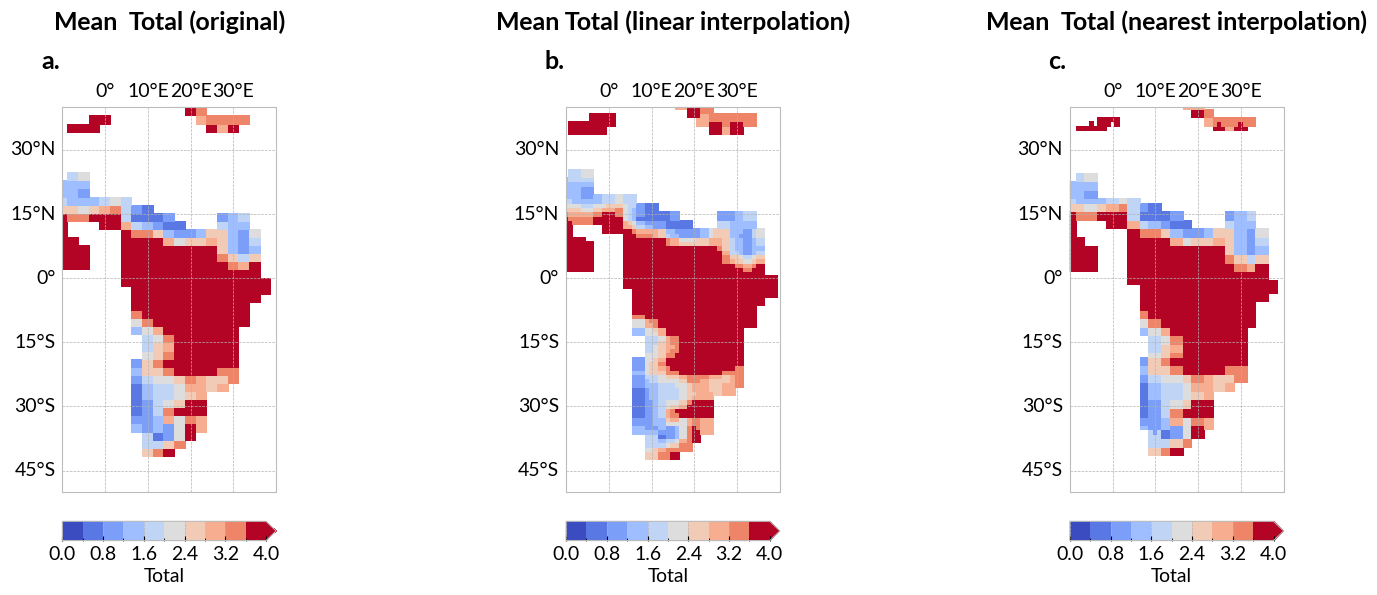

In [41]:
reload(cplt)
label_lai = 'Total'

mean_BNE_nearest = data1_nearest[label_lai].mean(dim='year', skipna=True)
mean_BNE_linear = data1_linear[label_lai].mean(dim='year')
mean_BNE_orig = data1_of[label_lai].mean(dim='year')

vmin_bne = 0
vmax_bne = 4

im = cplt.create_multi_plot(nrows=1, ncols=3, figsize=(18, 5),
                            projection='PlateCarree', wspace=0.3,
                            lon_range=[-10, 40], lat_range=[-50, 40],
                            )

im_comp = cplt.plot_map(mean_BNE_orig,
                        ax=im['ax'][0],
                        title=f'Mean  {label_lai} (original)',
                        plot_type='colormesh',
                        cmap='coolwarm',
                        levels=10,
                        label=label_lai,
                        vmin=vmin_bne, vmax=vmax_bne,
                        tick_step=2,
                        extend='max',
                        orientation='horizontal',
                        set_map=False,
                        )

im2 = cplt.plot_map(mean_BNE_linear,
                    ax=im['ax'][1],
                    title=f'Mean {label_lai} (linear interpolation)',
                    plot_type='colormesh',
                    cmap='coolwarm',
                    levels=10,
                    label=label_lai,
                    vmin=vmin_bne, vmax=vmax_bne,
                    tick_step=2,
                    extend='max',
                    orientation='horizontal',
                    set_map=False
                    )

im2 = cplt.plot_map(mean_BNE_nearest,
                    ax=im['ax'][2],
                    title=f'Mean  {label_lai} (nearest interpolation)',
                    plot_type='colormesh',
                    cmap='coolwarm',
                    levels=10,
                    label=label_lai,
                    vmin=vmin_bne, vmax=vmax_bne,
                    tick_step=2,
                    extend='max',
                    orientation='horizontal',
                    set_map=False
                    )

In [27]:
import geoutils.utils.spatial_utils as sput
reload(sput)

sput.get_mask_for_nan_array(data1_nearest)

<xarray.DataArray 'BNE' (lat: 171, lon: 360)> Size: 492kB
dask.array<where, shape=(171, 360), dtype=int64, chunksize=(171, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 77.0 78.0 79.0 80.0
  * lon      (lon) float64 3kB -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0

In [24]:
dims = gut.get_dims(data1_nearest)
dims = [dim for dim in dims if dim not in ['lat', 'lon']]